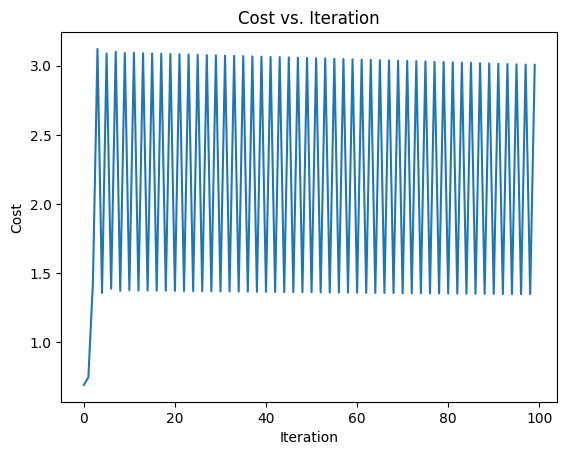

Training set accuracy: 0.37142857142857144
Testing set accuracy: 0.37719298245614036
Cross-validation scores: [0.8245614  0.85087719 0.87719298 0.9122807  0.89380531]
Mean cross-validation score: 0.8717435180872535
Confusion matrix:
[[43  0]
 [71  0]]


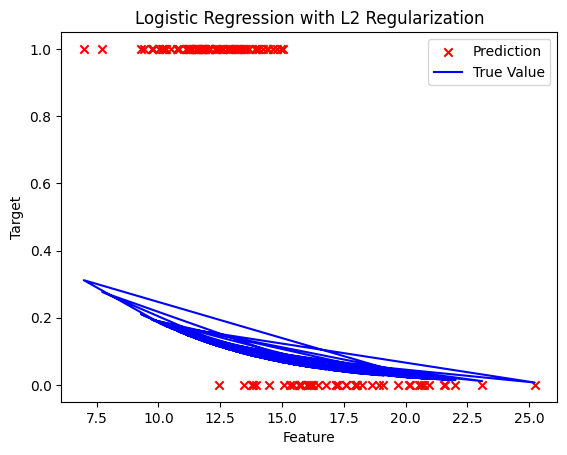

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Load the breast cancer dataset
breast_cancer = load_breast_cancer()
X = breast_cancer.data[:, 0:1]  # Use only one feature
y = breast_cancer.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add a column of ones to X for the intercept term
X_train = np.c_[np.ones(len(X_train)), X_train]
X_test = np.c_[np.ones(len(X_test)), X_test]

# Initialize the parameters
theta = np.zeros(X_train.shape[1])

# Set the learning rate, regularization parameter, and number of iterations
alpha = 0.1
lambda_ = 1
num_iters = 100

# Perform gradient descent to optimize theta and calculate the cost function
J_history = []
for i in range(num_iters):
    h = sigmoid(X_train @ theta)
    grad = (1 / len(X_train)) * X_train.T @ (h - y_train)
    reg_term = (lambda_ / len(X_train)) * np.r_[0, theta[1:]]
    theta -= alpha * (grad + reg_term)
    J = (-1/len(X_train)) * (y_train.T @ np.log(h) + (1 - y_train).T @ np.log(1 - h)) + (lambda_/(2*len(X_train))) * np.sum(theta[1:]**2)
    J_history.append(J)

# Plot the cost function
plt.plot(np.arange(num_iters), J_history)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Cost vs. Iteration")
plt.show()

# Compute the training set accuracy
h_train = sigmoid(X_train @ theta)
y_pred_train = np.round(h_train)
accuracy_train = np.mean(y_pred_train == y_train)
print("Training set accuracy:", accuracy_train)

# Compute the testing set accuracy
h_test = sigmoid(X_test @ theta)
y_pred_test = np.round(h_test)
accuracy_test = np.mean(y_pred_test == y_test)
print("Testing set accuracy:", accuracy_test)

# Perform cross-validation to estimate the model performance
scores = cross_val_score(LogisticRegression(C=1/lambda_, solver='lbfgs'), X, y, cv=5)
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", np.mean(scores))

# Create a confusion matrix of the testing set predictions
cm = confusion_matrix(y_test, y_pred_test)
print("Confusion matrix:")
print(cm)

# Plot the sigmoid function and the predictions on the test set
plt.scatter(X_test[:, 1], y_test, c='red', marker='x')
plt.plot(X_test[:, 1], sigmoid(X_test @ theta), c='blue')
plt.xlabel("Feature")
plt.ylabel("Target")
plt.title("Logistic Regression with L2 Regularization")
plt.legend(["Prediction", "True Value"])
plt.show()
